<a href="https://colab.research.google.com/github/SreevadanMulugu/AI-Photo-Search-App/blob/main/Google%20colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Please upload up to 10 images:


Saving image (31).webp to image (31) (1).webp
Saving image (30).webp to image (30) (1).webp
Saving image (29).webp to image (29) (1).webp
Saving image (28).webp to image (28) (1).webp
Saving image (27).webp to image (27) (1).webp
Saving image (26).webp to image (26) (1).webp
Saving image (25).webp to image (25) (1).webp
Saving image (24).webp to image (24) (1).webp
Saving image (23).webp to image (23) (1).webp
Saving image (22).webp to image (22).webp

Processing image 1/10...
Extracted Information from Image 1: - Train
- Steam
- Bridge
- Mountains
- Valley
- Trees
- Nature
- Landscape
- Transportation
- Travel
- Journey
- Scenic
- Scenery
- Adventure
- Tourism
- Traveling
- Journeying
- Adventure Travel
- Tourism Destination
- Scenic Route
- Nature Lovers
- Traveling Experience
- Adventure Seekers
- Tourism Industry
- Travel Destinations
- Scenic Spots
- Nature Enthusiasts
- Travel Guides
- Adventure Guides
- Tourism Brochures
- Travel Articles
- Nature Articles
-

Processing image 2/

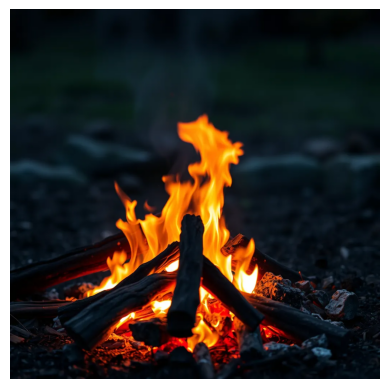

Image: image (28) (1).webp, Extracted Text: - Grilling
- Meat
- Vegetables
- Skewers
- Fire
- Smoke
- Outdoor
- Backyard
- Cooking
- Food
- Grilled
- Barbecue
- Flame
- Grilled
- Meat
- Vegetables
- Skewers
- Outdoor
- Backyard
- Cooking
- Food
- Grilled
- Barbecue
- Flame
- Grilled
- Meat
- Vegetables
- Skewers
- Outdoor
- Backyard
- Cooking
- Food
- Grilled
- Barbecue
- Flame
- Gr


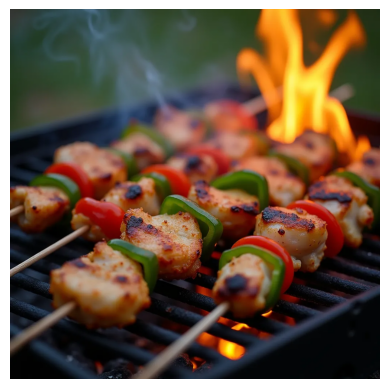

Image: image (26) (1).webp, Extracted Text: - Grilling
- Chicken
- Peppers
- Skewers
- Outdoor
- Fire
- Smoke
- Grilled


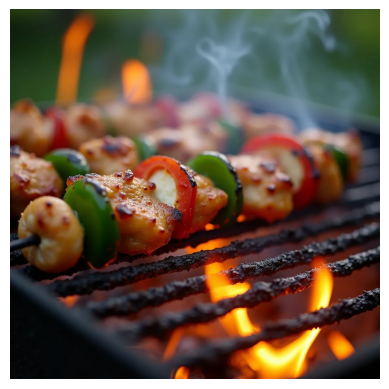


Do you want to search again? (yes/no): yes

Enter a query to search for matching words (or type 'cancel' to end): Japan

Found 1 matching images:
Image: image (27) (1).webp, Extracted Text: - Tokyo
- Japan
- Street scene
- Snow-covered buildings
- People walking
- Store signs
- Flags
- Snowfall


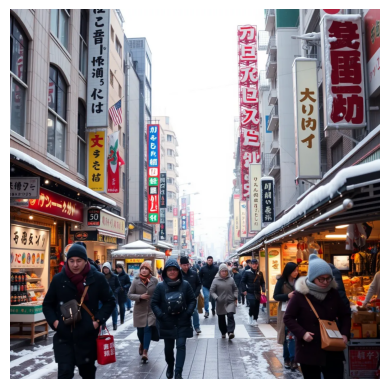


Do you want to search again? (yes/no): yes

Enter a query to search for matching words (or type 'cancel' to end): Urban

Found 2 matching images:
Image: image (23) (1).webp, Extracted Text: - Motorcycle
- Rider
- Highway
- Palm trees
- Buildings
- Skyscraper
- Urban
- Cityscape
- Traffic
- Street
- Evening
- Lighting
- Motion
- Speed
- City
- Transportation
- Safety
- Helmet
- Urban environment
- Palm trees
- Urban landscape
- Highway
- Motorcyclist
- Rider
- Highway
- Urban
- Cityscape
- Traffic
- Street
- Evening
- Lighting
- Motion
- Speed
- City
- Transportation
- Safety
- Helmet
- Urban environment
- Palm trees


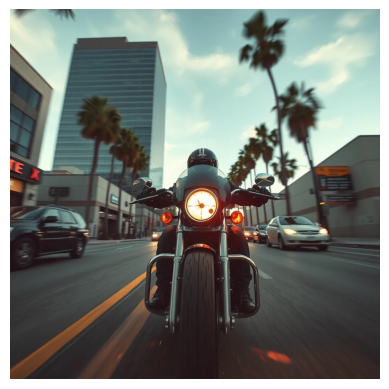

Image: image (22).webp, Extracted Text: - Motorcycle
- Rider
- Helmet
- Street
- Buildings
- Palm Trees
- Signage
- Nighttime
- Urban
- Lighting
- Traffic
- Cityscape
- Highway
- Speed
- Motion
- City
- Palm Trees
- Urban
- Lighting
- Nighttime
- Urban
- Highway
- Speed
- Motion
- City
- Palm
- Trees
- Urban
- Lighting
- Nighttime
- Urban
- Highway
- Speed
- Motion
- City
- Palm
- Trees
- Urban
- Lighting
- Nighttime



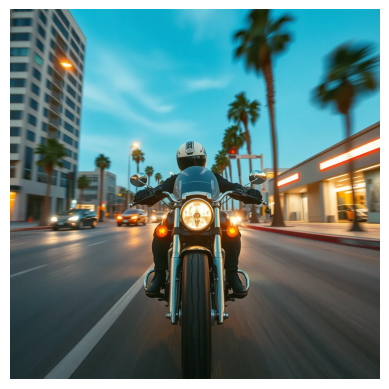


Do you want to search again? (yes/no): yes

Enter a query to search for matching words (or type 'cancel' to end): Ironman
No matching images found.

Do you want to search again? (yes/no): noodles

Enter a query to search for matching words (or type 'cancel' to end): noodles

Found 1 matching images:
Image: image (25) (1).webp, Extracted Text: - Two kittens
- Eating noodles
- Bowl of noodles
- Chopsticks
- Japanese text
- Wooden spoon


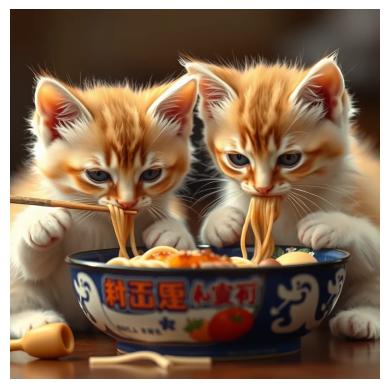


Do you want to search again? (yes/no): yes


In [ ]:
import torch
from transformers import Qwen2VLForConditionalGeneration, AutoProcessor
from qwen_vl_utils import process_vision_info
from google.colab import files
from PIL import Image
import io
import matplotlib.pyplot as plt

# Load the model on the available device(s)
model = Qwen2VLForConditionalGeneration.from_pretrained(
    "Qwen/Qwen2-VL-2B-Instruct", torch_dtype="auto", device_map="auto"
)

# Default processor
processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-2B-Instruct")

# Function to upload images
def upload_images(num_images=10):
    images = []
    print(f"Please upload up to {num_images} images:")
    uploaded = files.upload()
    for filename in uploaded.keys():
        images.append((Image.open(io.BytesIO(uploaded[filename])), filename))
    return images

# Process each image and extract information
def process_images(images):
    extracted_info = []
    for idx, (image, filename) in enumerate(images):
        print(f"\nProcessing image {idx + 1}/{len(images)}...")

        # Prepare the message
        messages = [
            {
                "role": "user",
                "content": [
                    {
                        "type": "image",
                        "image": image,
                    },
                    {"type": "text", "text": "Extract only unique keywords, text, numbers, and location from the image (max upto 10 unique keywords ) (No repeated words no assosisate verb forms only unique keywords print in console )"},
                ],
            }
        ]

        # Preparation for inference
        text = processor.apply_chat_template(
            messages, tokenize=False, add_generation_prompt=True
        )
        image_inputs, video_inputs = process_vision_info(messages)
        inputs = processor(
            text=[text],
            images=image_inputs,
            videos=video_inputs,
            padding=True,
            return_tensors="pt",
        )
        inputs = inputs.to("cuda")

        # Inference: Generation of the output
        generated_ids = model.generate(**inputs, max_new_tokens=128)
        generated_ids_trimmed = [
            out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
        ]
        output_text = processor.batch_decode(
            generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
        )[0]

        # Store the response along with the image filename
        extracted_info.append((filename, output_text))
        print(f"Extracted Information from Image {idx + 1}: {output_text}")

    return extracted_info

# Display webp images in Colab
def display_image(filename):
    img = Image.open(filename)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Query function for matching words
def query_images(extracted_info):
    while True:
        user_query = input("\nEnter a query to search for matching words (or type 'cancel' to end): ").strip().lower()
        if user_query == 'cancel':
            print("Query session ended.")
            break

        # Check for matches and display corresponding images
        matched_images = []
        query_words = set(user_query.split())

        for filename, text in extracted_info:
            extracted_words = set(text.lower().split())
            if extracted_words.intersection(query_words):
                matched_images.append((filename, text))

        if matched_images:
            print(f"\nFound {len(matched_images)} matching images:")
            for filename, text in matched_images:
                print(f"Image: {filename}, Extracted Text: {text}")
                display_image(filename)
        else:
            print("No matching images found.")

        # Option to ask for another query or cancel
        next_query = input("\nDo you want to search again? (yes/no): ").strip().lower()
        if next_query == 'no':
            print("Ending query session.")
            break

# Main function to run the full process
def main():
    # Step 1: Upload images
    images = upload_images(10)

    # Step 2: Process the images and extract information
    extracted_info = process_images(images)

    # Step 3: Query loop
    query_images(extracted_info)

# Independent query function to reuse preprocessed information
def query_on_saved_info(saved_info):
    query_images(saved_info)

# Run the main process
main()

